# Decison Tree Classifier for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the decision tree algorithm.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from XLB import *
from sklearn.feature_selection import SelectFromModel, SelectKBest, VarianceThreshold, chi2, f_classif, mutual_info_classif

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column

After the initial preprocessing step, we sperated the music features and the labelled emotion into the x_train and y_train arrays respectively

In [2]:
# extract data from files
x_train, y_train = extract_data("Adam_Set.csv")
x_val, y_val = extract_data("Adam_Validation_Set.csv")

# scale data values
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)

# feature selection
num_features = 45
feat_sel = VarianceThreshold()
x_train = feat_sel.fit_transform(x_train)
# feat_sel_2 = SelectFromModel(estimator=DecisionTreeClassifier(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=RandomForestClassifier(n_estimators=50,\
#                                              random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=LogisticRegression(random_state=481516234))
# feat_sel_2 = SelectFromModel(\
#                 estimator=svm.LinearSVC(C=0.25, penalty="l1", dual=False,\
#                                     random_state=481516234))
# f_classif 42.86% 0.37
feat_sel_2 = SelectKBest(f_classif,k=num_features)
x_train = feat_sel_2.fit_transform(x_train,y_train)
x_val = feat_sel_2.transform(feat_sel.transform(x_val))
# print("After Variance Threshold Feature Selection:",x_train.shape)

rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed, k_neighbors = 2)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(792, 45) (792,)
(792, 45) (792,)


Here we perform different methods to deal with imbalanced datasets. We used the oversampling *Insert link to oversampling if needed* and SMOTE methodology *Insert link to SMOTE if needed*

In [3]:
themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]
ovr_train = []
ovr_val = []
ovr_y_smote = []
ovr_y_os = []
for i in range(1,7):
    ovr_train.append(ovr_labels(y_train, i))
    ovr_val.append(ovr_labels(y_val,i))
    ovr_y_os.append(ovr_labels(y_os,i))
    ovr_y_smote.append(ovr_labels(y_smote,i))    

themes = ["Calm","Cheerful","Bravery","Fearful","Love","Sadness"]

Here we defined a function that will train the model and perform the hyperparameter search. x_train is the input data, y_train is the labels for the input data, and hp_search is the algorithm for hyperparameter search

This function trains the model, using the previously defined train_model function, and displays the confusion matrix of the model. 

The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the decison tree object and the hyperparameter search object.

In [4]:
# AdaBoost
random_search_iterations = 400
n_splits = 10
rand_seed = 3249807

parameters = {
    'n_estimators' : [i for i in range(30,61)],
    'learning_rate' : uniform(loc=0.1,scale=0.1),
    'algorithm' : ['SAMME', 'SAMME.R'],
    'base_estimator__criterion':["gini", "entropy"], 
    'base_estimator__splitter':["best", "random"], 
    'base_estimator__max_depth':range(1, 11), 
    'base_estimator__min_samples_split':uniform(loc=0,scale=1.0)
}

# train classifier for SMOTE data
dt = DecisionTreeClassifier(random_state=rand_seed)
adaboost = AdaBoostClassifier(base_estimator=dt,random_state=rand_seed)
random_search_adaboost = RandomizedSearchCV(adaboost, parameters,cv=n_splits, \
                                            random_state=rand_seed, \
                                            n_iter=random_search_iterations,\
                                            n_jobs=-1)

This model is trained using the default 

Best Score: 0.6558
Vanilla Train Accuracy: 77.2727%
[0 1 0 0 0 0 1 1 0 0 1 0 1 0 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Vanilla Validation Accuracy: 60.00%
Vanilla F1-score: 0.60
Vanilla Precision Score: 0.60
Vanilla Recall Score: 0.60
Vanilla ROC-AUC Score: 0.58

Best Score: 0.8345
Vanilla Train Accuracy: 84.7403%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8376
Vanilla Train Accuracy: 84.0909%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 86.67%
Vanilla F1-score: 0.80
Vanilla Precision Score: 0.75
Vanilla Recall Score: 0.87
Vanilla ROC-AUC Score: 0.50

Best Score: 0.8248
Vanilla Train Accuracy: 86.0390%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
Vanilla Validation Accuracy: 80.00%
Vanilla F1-score: 0.71
Vanilla Precision Score: 0.64
Vanilla Reca

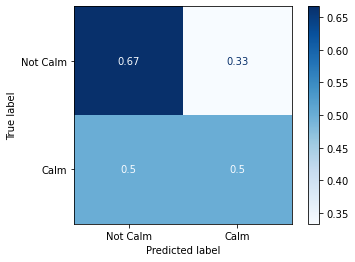

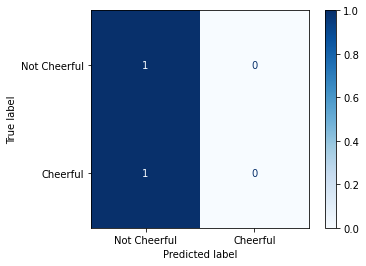

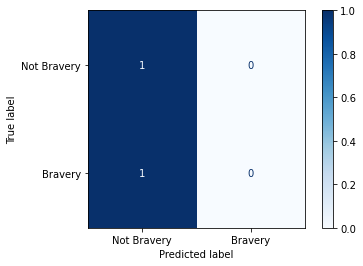

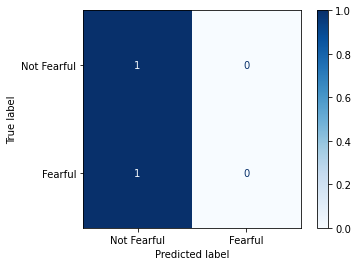

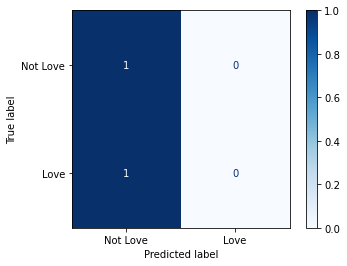

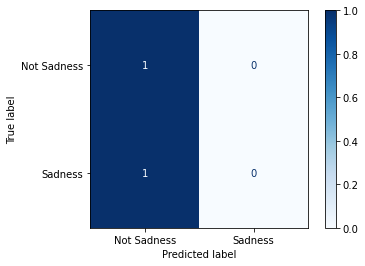

In [5]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Vanilla",x_train,ovr_train[i],random_search_adaboost, themes[i], verbose = False)
    test_res("Vanilla",x_val,ovr_val[i],random_search_adaboost, themes[i])

Best Score: 0.8877
Random Oversampling Train Accuracy: 100.0000%
[0 1 0 0 0 1 0 0 0 1 0 1 1 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
Random Oversampling Validation Accuracy: 80.00%
Random Oversampling F1-score: 0.80
Random Oversampling Precision Score: 0.81
Random Oversampling Recall Score: 0.80
Random Oversampling ROC-AUC Score: 0.81

Best Score: 0.9812
Random Oversampling Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 86.67%
Random Oversampling F1-score: 0.80
Random Oversampling Precision Score: 0.75
Random Oversampling Recall Score: 0.87
Random Oversampling ROC-AUC Score: 0.50

Best Score: 0.9862
Random Oversampling Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
Random Oversampling Validation Accuracy: 86.67%
Random Oversampling F1-score: 0.80
Random Oversampling Precision Score: 0.75
Random Oversampling Recall Score: 0.87
Random Oversampling ROC-AUC Score: 0.50

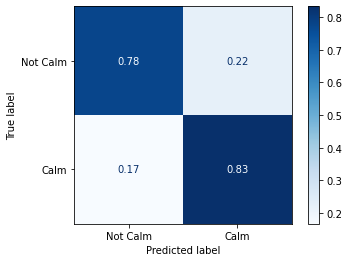

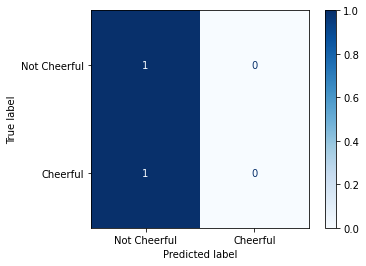

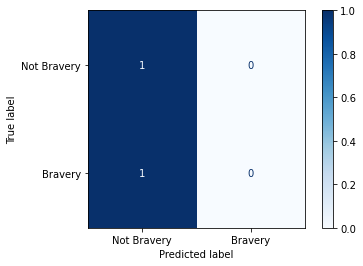

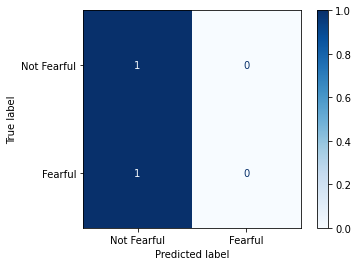

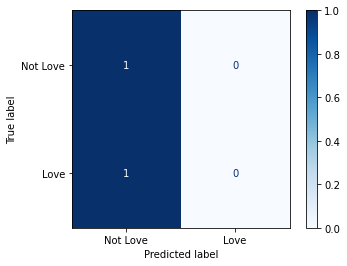

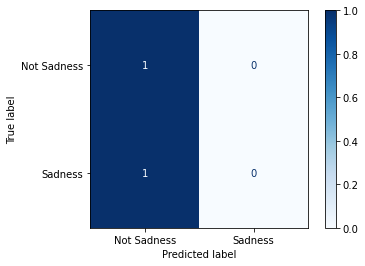

In [6]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("Random Oversampling",x_os,ovr_y_os[i],random_search_adaboost,themes[i], verbose = False)
    test_res("Random Oversampling",x_val,ovr_val[i],random_search_adaboost,themes[i])

Best Score: 0.8651
algorithm => SAMME.R
base_estimator__criterion => gini
base_estimator__max_depth => 8
base_estimator__min_samples_split => 0.006309627864128364
base_estimator__splitter => best
learning_rate => 0.11128453952864295
n_estimators => 47
Splits: 10
SMOTE Train Accuracy: 100.0000%
[0 1 0 1 0 0 1 0 0 0 1 0 0 1 1]
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
SMOTE Validation Accuracy: 60.00%
SMOTE F1-score: 0.60
SMOTE Precision Score: 0.60
SMOTE Recall Score: 0.60
SMOTE ROC-AUC Score: 0.58

Best Score: 0.9459
algorithm => SAMME.R
base_estimator__criterion => gini
base_estimator__max_depth => 7
base_estimator__min_samples_split => 0.011984100649327645
base_estimator__splitter => random
learning_rate => 0.16851818978643487
n_estimators => 35
Splits: 10
SMOTE Train Accuracy: 100.0000%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
SMOTE Validation Accuracy: 86.67%
SMOTE F1-score: 0.80
SMOTE Precision Score: 0.75
SMOTE Recall Score: 0.87
SMOTE ROC-AUC Score: 0.50

Best Score

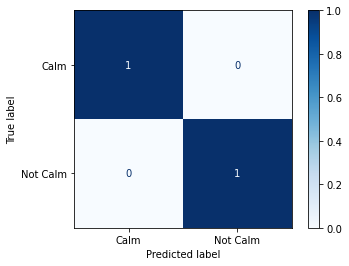

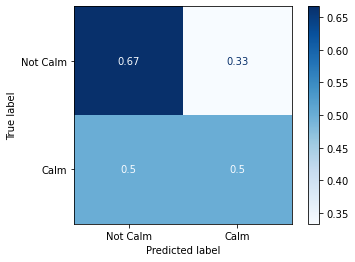

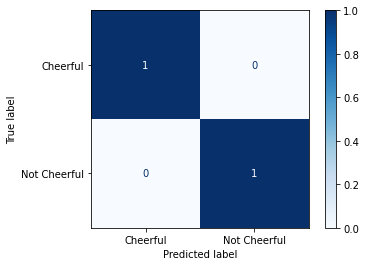

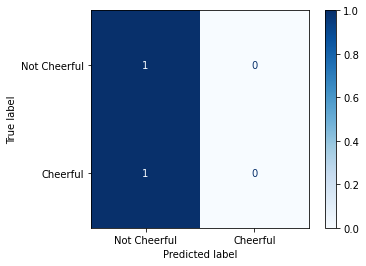

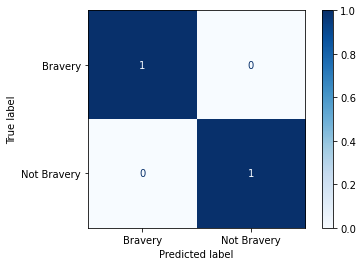

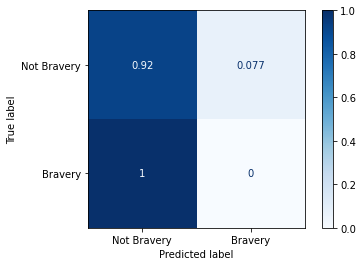

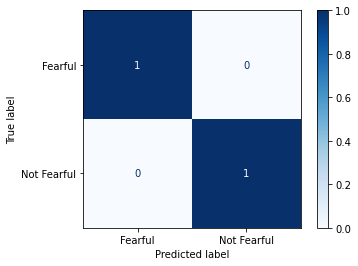

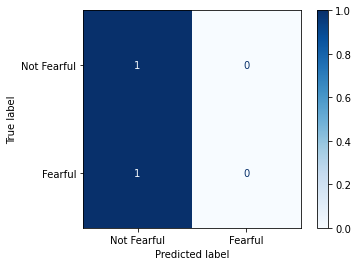

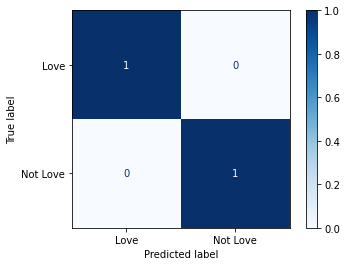

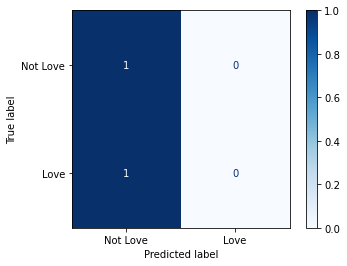

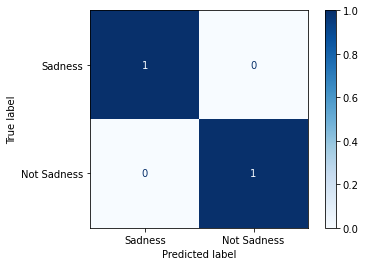

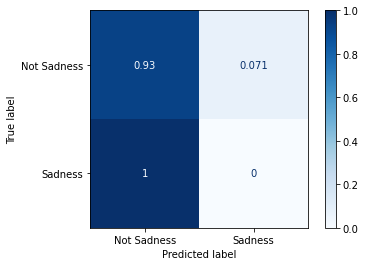

In [7]:
for i in range(0,6):
    if(i > 0):
        print()
    print_res("SMOTE",x_smote,ovr_y_smote[i],random_search_adaboost,themes[i])
    test_res("SMOTE",x_val,ovr_val[i],random_search_adaboost,themes[i])